In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv('rdu-weather-history.csv')
df['temperaturemin'].fillna(df['temperaturemin'].mean(),inplace=True)
df['temperaturemax'].fillna(df['temperaturemax'].mean(),inplace=True)
df['precipitation'].fillna(df['precipitation'].mean(),inplace=True)
df['snowfall'].fillna(df['snowfall'].mean(),inplace=True)
df['snowdepth'].fillna(df['snowdepth'].mean(),inplace=True)
df['avgwindspeed'].fillna(df['avgwindspeed'].mean(),inplace=True)
df['avgwindspeed'].fillna(df['avgwindspeed'].mean(),inplace=True)



In [43]:
df.head()

temperaturemin  temperaturemax  precipitation  snowfall  snowdepth  \
0            64.9            87.1           0.93       0.0        0.0   
1            70.0            90.0           0.76       0.0        0.0   
2            75.0            93.0           0.00       0.0        0.0   
3            61.0            73.9           0.11       0.0        0.0   
4            64.9            84.9           0.00       0.0        0.0   

   avgwindspeed  rain  
0          6.93     1  
1          3.36     1  
2          7.61     1  
3          3.80     1  
4          2.46     1

In [44]:
df.describe()

temperaturemin  temperaturemax  precipitation     snowfall  \
count     4475.000000     4475.000000    4475.000000  4475.000000   
mean        50.664201       71.995955       0.129491     0.013969   
std         16.272465       16.576034       0.373539     0.216690   
min          4.100000       23.200000       0.000000     0.000000   
25%         37.000000       60.100000       0.000000     0.000000   
50%         52.000000       73.900000       0.000000     0.000000   
75%         66.000000       86.000000       0.050000     0.000000   
max         80.100000      105.100000       6.450000     7.010000   

         snowdepth  avgwindspeed         rain  
count  4475.000000   4475.000000  4475.000000  
mean      0.017739      5.856363     0.195084  
std       0.214429      2.945944     0.396309  
min       0.000000      0.000000     0.000000  
25%       0.000000      3.580000     0.000000  
50%       0.000000      5.370000     0.000000  
75%       0.000000      7.610000     0.000000  
max       5.910000     20.360000     1.000000

In [45]:
df.corr()

temperaturemin  temperaturemax  precipitation  snowfall  \
temperaturemin        1.000000        0.906321       0.122254 -0.100433   
temperaturemax        0.906321        1.000000       0.005647 -0.137531   
precipitation         0.122254        0.005647       1.000000  0.079709   
snowfall             -0.100433       -0.137531       0.079709  1.000000   
snowdepth            -0.147512       -0.163471       0.016861  0.436130   
avgwindspeed          0.101701        0.036143       0.174436  0.041235   
rain                  0.094721       -0.001938       0.201844  0.041788   

                snowdepth  avgwindspeed      rain  
temperaturemin  -0.147512      0.101701  0.094721  
temperaturemax  -0.163471      0.036143 -0.001938  
precipitation    0.016861      0.174436  0.201844  
snowfall         0.436130      0.041235  0.041788  
snowdepth        1.000000     -0.007803  0.009164  
avgwindspeed    -0.007803      1.000000  0.153621  
rain             0.009164      0.153621  1.000000

In [47]:
df.corr()

temperaturemin  temperaturemax  precipitation  snowfall  \
temperaturemin        1.000000        0.906321       0.122254 -0.100433   
temperaturemax        0.906321        1.000000       0.005647 -0.137531   
precipitation         0.122254        0.005647       1.000000  0.079709   
snowfall             -0.100433       -0.137531       0.079709  1.000000   
snowdepth            -0.147512       -0.163471       0.016861  0.436130   
avgwindspeed          0.101701        0.036143       0.174436  0.041235   
rain                  0.094721       -0.001938       0.201844  0.041788   

                snowdepth  avgwindspeed      rain  
temperaturemin  -0.147512      0.101701  0.094721  
temperaturemax  -0.163471      0.036143 -0.001938  
precipitation    0.016861      0.174436  0.201844  
snowfall         0.436130      0.041235  0.041788  
snowdepth        1.000000     -0.007803  0.009164  
avgwindspeed    -0.007803      1.000000  0.153621  
rain             0.009164      0.153621  1.000000

In [50]:
X=df.loc[:,'temperaturemin':'avgwindspeed']
X.head()
y=df.rain

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0)


In [52]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.08175989270584694
0.08288384217883671


In [53]:
from pandas import DataFrame,Series
coeff=DataFrame(X_train.columns)
coeff['Coefficient Estimate']=Series(clf.coef_)
coeff

0  Coefficient Estimate
0  temperaturemin              0.009831
1  temperaturemax             -0.008683
2   precipitation              0.132085
3        snowfall              0.010629
4       snowdepth              0.028904
5    avgwindspeed              0.013057

In [54]:
clf.intercept_

0.22329856959055366

In [57]:
predict=clf.predict(X_test)
predict

array([0.21301679, 0.20278337, 0.19554617, ..., 0.32053171, 0.20936997,
       0.03300564])

In [58]:
mse=np.mean((predict-y_test)**2)
np.sqrt(mse)

0.3900696400709775

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


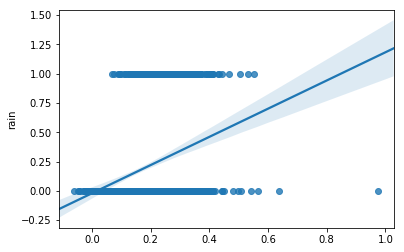

In [59]:
sns.regplot(x=predict,y=y_test)